In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\Data sets\IRIS.csv")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
x = data.drop("species",axis=1)
y = data['species']

In [5]:
x.shape,y.shape

((150, 4), (150,))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 30, random_state= 12)
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(x)
print(std_data.shape)

(150, 4)


In [9]:
std_data 

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [10]:
#mean_vec = np.mean(x_std,axis=0)
#cov_mat=(x_std-mean_vec).T.dot((x_std-mean_vec))/(x_std)
#print('covariance matrix\n%' % cov__mat)

In [11]:
print('covariance matrix\n')
cov_mat = np.cov(std_data,rowvar= False)
cov_mat

covariance matrix



array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [12]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(std_data)

PCA()

In [13]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [14]:
#The amount of variance that each column explains
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [15]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#np.cumsum(pca.explained_variance_ratio_)

In [16]:
print(var1)

[ 72.77  95.8   99.48 100.  ]


In [17]:
np.arange(len(pca.explained_variance_ratio_))

array([0, 1, 2, 3])

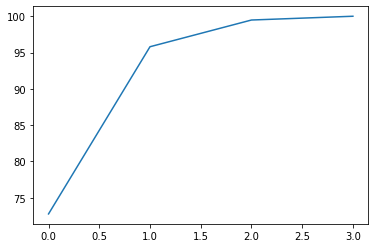

In [18]:
plt.plot(var1)

In [19]:
#import plotly.express as px

#px.line(x = np.arange(len(pca.explained_variance_ratio_)), y = np.cumsum(pca.explained_variance_ratio_))



In [20]:
# configuring the parameteres
# number of components = 2
pca_new = PCA(n_components = 2)
pca_new_data = pca_new.fit_transform(std_data)

# Lets look at the shape of data after PCA
print("shape = ", pca_new_data.shape)

shape =  (150, 2)


In [21]:
print(pca_new_data )

[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14030596e+00  3

In [24]:
pca_df = pd.DataFrame(data=pca_new_data, columns=("1st_principal", "2nd_principal"))

pca_df["y"] = y.values

pca_df.head()

,1st_principal,2nd_principal,y
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [ ]:
#print(pca_df["1st_principal"])

In [ ]:
#px.scatter(pca_df, x = "1st_principal",  y = "2nd_principal",  color = "Label")

In [25]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
17,5.1,3.5,1.4,0.3
81,5.5,2.4,3.7,1.0
103,6.3,2.9,5.6,1.8
33,5.5,4.2,1.4,0.2
101,5.8,2.7,5.1,1.9
...,...,...,...,...
76,6.8,2.8,4.8,1.4
3,4.6,3.1,1.5,0.2
130,7.4,2.8,6.1,1.9
134,6.1,2.6,5.6,1.4


In [26]:
scal = StandardScaler()
X_train = scal.fit_transform(x_train)
X_test = scal.transform(x_test)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

plt.figure(figsize=(8,6))
plt.scatter(x=pca_df["1st_principal"],x=pca_df["2nd_principal"],c=label,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

